# Notebook for exploration of NSL-KDD dataset in preparation for modeling and analysis

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# inline plotting
%matplotlib inline
sns.set(style = 'whitegrid')

# custom modules
import sys
sys.path.append('../') # for importing from src
from src.data_prep import preprocess_nsl_kdd, load_nsl_kdd

## Load and Preprocess

In [2]:
data_path = '../data/raw/KDDTrain+.txt'
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Dataset not found at {data_path}. Please download it from https://www.unb.ca/cic/datasets/nsl.html")
    
df = preprocess_nsl_kdd(
    path = data_path,
    normalize = True,
    scaler = 'standard',
    apply_variance_filter = True,
    variance_threshold = 0.01,
    apply_corr_filter = True,
    corr_threshold = 0.9)

df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,binary_label
0,-0.110249,-0.124706,-0.686785,0.751111,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,0.771283,-0.349683,-0.374560,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,0
1,-0.110249,2.219312,0.781428,0.751111,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.321428,0.482201,-0.374560,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,0
2,-0.110249,-0.124706,1.087305,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.389669,0.038529,-0.374560,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1
3,-0.110249,-0.124706,-0.442083,0.751111,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,0.771283,-0.349683,-0.374560,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,0
4,-0.110249,-0.124706,-0.442083,0.751111,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,0.771283,-0.349683,-0.028179,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,0
5,-0.110249,-0.124706,1.087305,-2.223581,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.139453,-0.016930,-0.374560,0.734343,-0.873089,-1.005110,-0.068553,-0.480197,-0.289103,1
6,-0.110249,-0.124706,1.087305,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.389669,-0.016930,-0.374560,0.734343,-0.963422,-1.071933,-0.174417,-0.480197,-0.289103,1
7,-0.110249,-0.124706,1.087305,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.184947,-0.016930,-0.374560,0.734343,-0.909222,-1.027384,-0.068553,-0.480197,-0.289103,1
8,-0.110249,-0.124706,1.209656,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.298681,-0.072389,-0.374560,0.734343,-0.836956,-0.960561,-0.174417,-0.480197,-0.289103,1
9,-0.110249,-0.124706,1.087305,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.366922,-0.016930,-0.374560,0.734343,-0.927289,-1.049659,-0.121485,-0.480197,-0.289103,1


## Dataset Dimensions

In [4]:
print(f"shape: {df.shape}")
print("\nFeature Types:")
print(df.dtypes.value_counts())

shape: (125973, 34)

Feature Types:
float64    33
int64       1
Name: count, dtype: int64


## Summary Statistics

In [5]:
df.describe().T.sort_values('std', ascending = False)

,count,mean,std,min,25%,50%,75%,max
num_access_files,125973.0,-5.302011e-18,1.000004,-0.041221,-0.041221,-0.041221,-0.041221,90.530138
num_shells,125973.0,3.976508e-18,1.000004,-0.018610,-0.018610,-0.018610,-0.018610,90.148485
rerror_rate,125973.0,3.829857e-17,1.000004,-0.374362,-0.374362,-0.374362,-0.374362,2.746403
dst_bytes,125973.0,7.614590e-19,1.000004,-0.004919,-0.004919,-0.004919,-0.004790,325.748606
root_shell,125973.0,1.754176e-17,1.000004,-0.036652,-0.036652,-0.036652,-0.036652,27.283738
diff_srv_rate,125973.0,-1.714693e-17,1.000004,-0.349683,-0.349683,-0.349683,-0.016930,5.196208
num_failed_logins,125973.0,2.989431e-18,1.000004,-0.027023,-0.027023,-0.027023,-0.027023,110.497182
srv_diff_host_rate,125973.0,-2.729971e-17,1.000004,-0.374560,-0.374560,-0.374560,-0.374560,3.474118
serror_rate,125973.0,4.484147e-18,1.000004,-0.637209,-0.637209,-0.637209,1.602664,1.602664
dst_host_srv_diff_host_rate,125973.0,3.068398e-17,1.000004,-0.289103,-0.289103,-0.289103,-0.111426,8.594782


## Binary Class Distribution

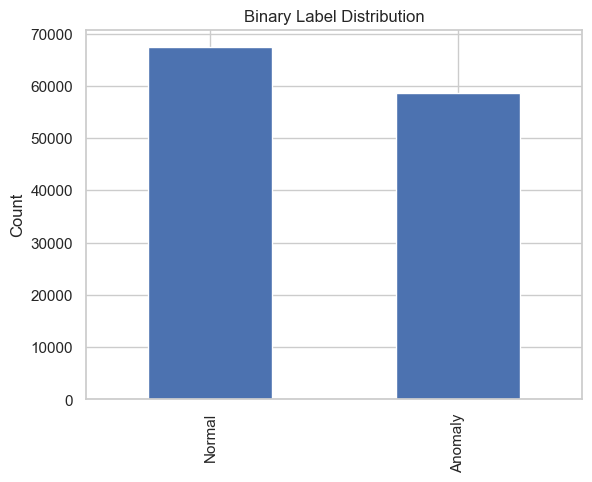

In [6]:
binary_counts = df['binary_label'].value_counts().sort_index()
binary_counts.index = ['Normal', 'Anomaly']
binary_counts.plot(kind = 'bar')
plt.title('Binary Label Distribution')
plt.ylabel('Count')
plt.show()

## Check Missing / Constant Values

In [8]:
print("Missing values per column")
print(df.isnull().sum().sort_values(ascending = False).head())

print("\nZero-variance features (if any):")
print((df.nunique() == 1).sum())

Missing values per column
duration          0
diff_srv_rate     0
is_guest_login    0
count             0
srv_count         0
dtype: int64

Zero-variance features (if any):
0


## Correlation Heatmap

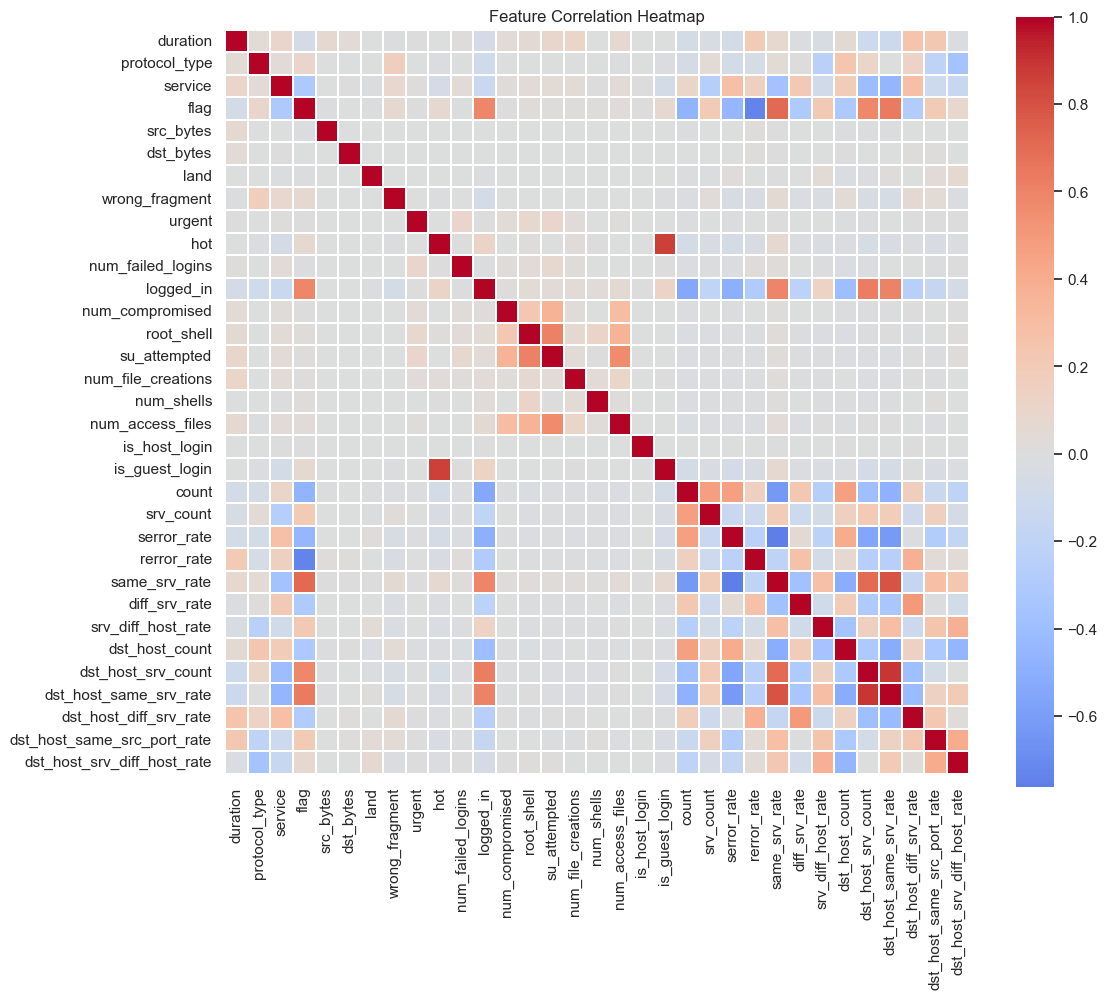

In [9]:
plt.figure(figsize = (12, 10))
corr = df.drop(columns = 'binary_label').corr()
sns.heatmap(corr, cmap = 'coolwarm', center = 0, square = True, linewidth = 0.3)
plt.title('Feature Correlation Heatmap')
plt.show()

## Class-Based Summary

In [10]:
grouped = df.groupby('binary_label').mean().T
grouped.columns = ['Normal', 'Anomaly']
grouped['diff'] = grouped['Anomaly'] - grouped['Normal']
grouped.sort_values('diff', ascending = False).head(10)

,Normal,Anomaly,diff
serror_rate,-0.607103,0.697325,1.304428
count,-0.537862,0.617794,1.155656
dst_host_count,-0.349949,0.401955,0.751905
service,-0.258039,0.296386,0.554425
rerror_rate,-0.236437,0.271574,0.508011
dst_host_diff_srv_rate,-0.226641,0.260322,0.486962
diff_srv_rate,-0.190029,0.218269,0.408298
wrong_fragment,-0.089486,0.102785,0.192271
dst_host_same_src_port_rate,-0.086257,0.099076,0.185333
dst_host_srv_diff_host_rate,-0.058160,0.066804,0.124964


## Wrap up - Ready to move to modeling

In [11]:
df.to_csv("../data/processed/KDDTrain+_processed.csv", index = False)
print("Processed data saved")

Processed data saved
